# Churn Prediction Using Ensemble Techniques

This project based on Machine Learning focused on predicting customer churn using Ensemble Learning Techniques.
* Customer Churn refers to when a customer stops using a service or subscription.Companies use churn prediction to identify customers who are likely to leave, so they can take action to retain them.

Build a machine learning model that can predict whether a customer will churn or not using ensemble models like:
* Random Forest
* XGBoost
* LightGBM

Why Ensemble Learning?
* Improve prediction accuracy
* Reduce overfitting
* Handles complex data patterns
   include:
* Bagging(like Random Forest)
* Boosting(like XGBoost, LightGBM)


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [34]:
df = pd.read_csv(r"C:\Users\Admin\Desktop\customer_churn_dataset-testing-master.csv")

In [36]:
df

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0
...,...,...,...,...,...,...,...,...,...,...,...,...
64369,64370,45,Female,33,12,6,21,Basic,Quarterly,947,14,1
64370,64371,37,Male,6,1,5,22,Standard,Annual,923,9,1
64371,64372,25,Male,39,14,8,30,Premium,Monthly,327,20,1
64372,64373,50,Female,18,19,7,22,Standard,Monthly,540,13,1


In [39]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         64374 non-null  int64 
 1   Age                64374 non-null  int64 
 2   Gender             64374 non-null  object
 3   Tenure             64374 non-null  int64 
 4   Usage Frequency    64374 non-null  int64 
 5   Support Calls      64374 non-null  int64 
 6   Payment Delay      64374 non-null  int64 
 7   Subscription Type  64374 non-null  object
 8   Contract Length    64374 non-null  object
 9   Total Spend        64374 non-null  int64 
 10  Last Interaction   64374 non-null  int64 
 11  Churn              64374 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 5.9+ MB
None


In [41]:
df.isnull()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
64369,False,False,False,False,False,False,False,False,False,False,False,False
64370,False,False,False,False,False,False,False,False,False,False,False,False
64371,False,False,False,False,False,False,False,False,False,False,False,False
64372,False,False,False,False,False,False,False,False,False,False,False,False


In [43]:
df.dropna()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0
...,...,...,...,...,...,...,...,...,...,...,...,...
64369,64370,45,Female,33,12,6,21,Basic,Quarterly,947,14,1
64370,64371,37,Male,6,1,5,22,Standard,Annual,923,9,1
64371,64372,25,Male,39,14,8,30,Premium,Monthly,327,20,1
64372,64373,50,Female,18,19,7,22,Standard,Monthly,540,13,1


In [45]:
from sklearn.preprocessing import LabelEncoder

In [47]:
le = LabelEncoder()
for column in df.select_dtypes(include = 'object').columns:
    df[column] = le.fit_transform(df[column])

In [49]:
df.isnull()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
64369,False,False,False,False,False,False,False,False,False,False,False,False
64370,False,False,False,False,False,False,False,False,False,False,False,False
64371,False,False,False,False,False,False,False,False,False,False,False,False
64372,False,False,False,False,False,False,False,False,False,False,False,False


##  Exploratory Data Analysis

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

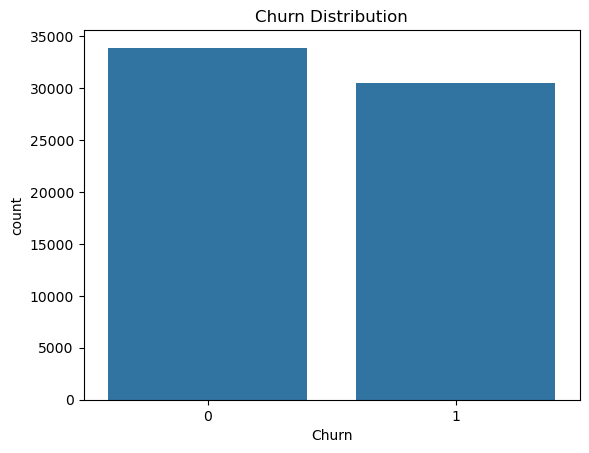

In [54]:
sns.countplot(data = df,x='Churn')
plt.title('Churn Distribution')
plt.show()

In [56]:
type(df)

pandas.core.frame.DataFrame

In [58]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction', 'Churn'],
      dtype='object')

Text(0.5, 1.0, 'Feature Correlation')

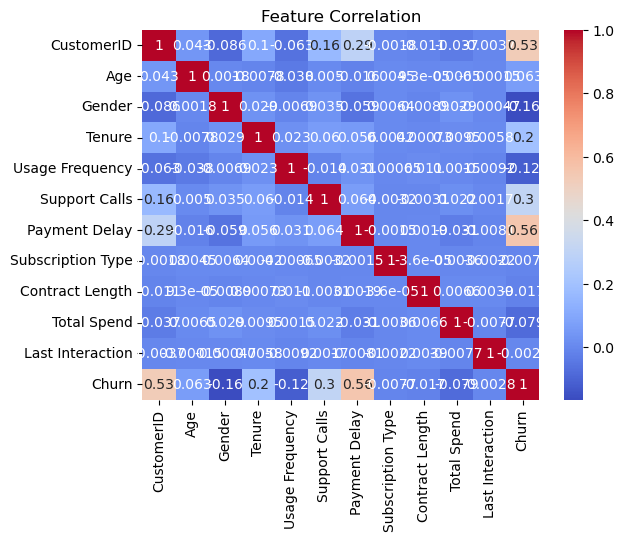

In [60]:
# Correlation Heatmap
sns.heatmap(df.select_dtypes(include = 'number').corr(),annot = True, cmap = 'coolwarm')
plt.title('Feature Correlation')


## Handle Class Imbalance

In [66]:
print(x.dtypes)

CustomerID           int64
Age                  int64
Gender               int32
Tenure               int64
Usage Frequency      int64
Support Calls        int64
Payment Delay        int64
Subscription Type    int32
Contract Length      int32
Total Spend          int64
Last Interaction     int64
dtype: object


In [68]:
from imblearn.over_sampling import SMOTE

In [64]:
x = df.drop('Churn', axis = 1)
y = df['Churn']
x_encoded = pd.get_dummies(x,drop_first = True)

In [70]:
# Apply SMOTE
sm = SMOTE(random_state=42)
x_res, y_res = sm.fit_resample(x_encoded,y)


In [72]:
print(x_encoded.dtypes)

CustomerID           int64
Age                  int64
Gender               int32
Tenure               int64
Usage Frequency      int64
Support Calls        int64
Payment Delay        int64
Subscription Type    int32
Contract Length      int32
Total Spend          int64
Last Interaction     int64
dtype: object


In [74]:
print(y.value_counts())

Churn
0    33881
1    30493
Name: count, dtype: int64


In [76]:
print(pd.Series(y_res).value_counts())

Churn
1    33881
0    33881
Name: count, dtype: int64


## Model Building

In [79]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [81]:
# Split data
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size = 0.2, random_state=42)

In [83]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [84]:
# XgBoost
xgb = XGBClassifier()
xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [85]:
# LightGBM
lgbm = LGBMClassifier()
lgbm.fit(x_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 27081, number of negative: 27128
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009658 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 732
[LightGBM] [Info] Number of data points in the train set: 54209, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499566 -> initscore=-0.001734
[LightGBM] [Info] Start training from score -0.001734


LGBMClassifier()

In [109]:
# Cross-validation scores
print("Random Forest CV Accuracy:",cross_val_score(rf, x_res, y_res, cv=5).mean())


Random Forest CV Accuracy: 0.8747655635651752


In [110]:
print("XGBoost CV Accuracy:",cross_val_score(xgb, x_res, y_res, cv = 5).mean())

XGBoost CV Accuracy: 0.8612771770732438


In [111]:
from lightgbm import LGBMClassifier

In [123]:
lgbm = LGBMClassifier(verbosity=-1)

In [125]:
print("LightGBM CV Accuracy:", cross_val_score(lgbm, x_res, y_res, cv = 5).mean())

LightGBM CV Accuracy: 0.8604075653926241


## Evaluation

In [127]:
from sklearn.metrics import confusion_matrix, roc_auc_score, classification_report

In [129]:
models = {'Random Forest':rf, 'XGBoost':xgb, 'LightGBM': lgbm}

In [133]:
for name, model in models.items():model.fit(x_train,y_train)

In [134]:
for name, model in models.items():y_pred = model.predict(x_test)

In [137]:
print(f"{name} Classification Report:")
print(classification_report(y_test, y_pred))

LightGBM Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      6753
           1       1.00      0.99      1.00      6800

    accuracy                           1.00     13553
   macro avg       1.00      1.00      1.00     13553
weighted avg       1.00      1.00      1.00     13553

